# Fashion (MACS 40400: Computation and the Identification of Cultural Patterns)

## Part III: Identifying Zegna Uomo Interpretants

Today, we're going to attempt to discover if there are any conventional interpretants for Zegna's Uomo cologne. In class on Tuesday, we saw that the product was intended to produce interpretants related to the concepts of masculinity, mastery and sophistication. Today, we are evaluating whether these are the sorts of interpretants that are actually produced in the circles of interpreters outside of individual advertisement that we watched by analyzing the words used in YouTube videos and the things that appear in images related to the Zegna brand more generally on Flickr.

In Part II, we explored meanings associated with the Zegna brand by identifying some of the most frequently appearing elements in photos associated with the brand on Flickr. The Uomo fragrance draws some of its meaning from the Zegna brand more generally and we could see that the Zegna brand does indeed seem to be associated with a certain "urban gentleman" masculinity.

In Part III, we will explore the interpretants produced by YouTube influencers who have posted about the Uomo product in particular, using the YouTube text data gathered in Part II.

**************

Before class, please download the "gensim" package and run the following code cell to download several items for NLTK (Natural Language Toolkit). You can do this by clicking on your 'Anaconda Navigator' Program and completing the [following instructions](https://stackoverflow.com/questions/39299726/cant-find-package-on-anaconda-navigator-what-to-do-next), or by accessing your terminal and typing `conda install gensim` (and completing the installation process).

If you would like further practice with NLTK and Gensim after completing this demo, check out DataCamp's [Introduction to Natural Language Processing in Python](https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python) course (especially chapters 1 and 2).


In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from gensim import corpora, models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read in Youtube Data for Uomo from Part II
uomo_yt_df = pd.read_json('uomo_yt100.json')
uomo_yt_df.dropna(inplace=True)

# Functions for Analysis:
def pos_tag(text):
    import string
    
    # Define stop words--common words like "the"--and punctuation to drop from analysis
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ["amp", "39", "subscribe", "follow",
                                                                                "link", "ermenegildo", "zegna", "uomo",
                                                                                "music", "applause", "um", "facebook"
                                                                               ]
    
    # Tokenize words using nltk.word_tokenize, keeping only those tokens that do not appear in the stop words we defined
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    
    # Label parts of speech automatically using NLTK
    pos_tagged = nltk.pos_tag(tokens)
    return pos_tagged

def plot_top_adj(series, data_description):
    # Apply part of Speech tagger that we wrote above to any Pandas series that pass into the function
    pos_tagged = series.apply(pos_tag)

    # Extend list so that it contains all words/parts of speech for all the captions
    pos_tagged_full = []
    for i in pos_tagged:
        pos_tagged_full.extend(i)
    
    # Create Frequency Distribution of different adjectives and plot the distribution
    fd = nltk.FreqDist(word + "/" + tag for (word, tag) in pos_tagged_full if tag[:2] == 'JJ')
    fd.plot(15, title='Top 15 Adjectives for ' + data_description);
    return

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def get_lemmas(text):
    import string
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ["amp", "39", "subscribe", "follow",
                                                                                "link", "ermenegildo", "zegna", "uomo",
                                                                                "music", "applause", "um", "facebook"
                                                                               ]
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    return lemmas

def plot_top_lemmas(series, data_description):
    lemmas = series.apply(get_lemmas)

    # Extend list so that it contains all words/parts of speech for all the captions
    lemmas_full = []
    for i in lemmas:
        lemmas_full.extend(i)

    nltk.FreqDist(lemmas_full).plot(20, title='Top 10 Lemmas Overall for ' + data_description);
    return

def plot_top_tfidf(series, data_description):
    # Apply 'get lemmas' function to any Pandas Series that we pass in to get lemmas for each row in the Series
    lemmas = series.apply(get_lemmas)
    
    # Initialize Series of lemmas as Gensim Dictionary for further processing
    dictionary = corpora.Dictionary([i for i in lemmas])

    # Convert dictionary into bag of words format: list of (token_id, token_count) tuples
    bow_corpus = [dictionary.doc2bow(text) for text in lemmas]
    
    # Calculate TFIDF based on bag of words counts for each token and return weights:
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_weights=[]
    
    for doc in tfidf[bow_corpus]:
        tfidf_weights.extend([[dictionary[ID], np.around(freq, decimals=2)] for ID, freq in doc])

    # Sort TFIDF weights highest to lowest:
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
    # Plot the top 10 weighted words:
    top_10 = {k:v for k,v in sorted_tfidf_weights[:10]} # dictionary comprehension
    plt.plot(list(top_10.keys()), list(top_10.values()))
    plt.xticks(rotation='vertical')
    plt.title('Top 10 Lemmas (TFIDF) for ' + data_description);
    
    return

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanwenwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yanwenwang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/yanwenwang/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanwenwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yanwenwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yanwenwang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores('Hell'))

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6808}


In [7]:
def sentiment_score(text):
    return sid.polarity_scores(text)['compound']

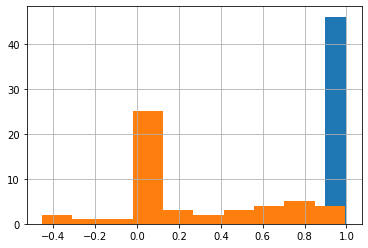

In [11]:
uomo_yt_df['Captions'].apply(sentiment_score).hist()
uomo_yt_df['Description'].apply(sentiment_score).hist();

In [12]:
pos_tagged_captions = uomo_yt_df['Captions'].apply(pos_tag)

pos_tagged_captions_full = []
for i in pos_tagged_captions:
    pos_tagged_captions_full.extend(i)
    

In [14]:
pos_tagged_captions_full[-10:]

[('philosophy', 'NN'),
 ('color', 'NN'),
 ('result', 'NN'),
 ('modernistic', 'JJ'),
 ('expression', 'NN'),
 ('tradition', 'NN'),
 ('creating', 'VBG'),
 ('innovative', 'JJ'),
 ('sophisticated', 'JJ'),
 ('aesthetic', 'JJ')]

In [15]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


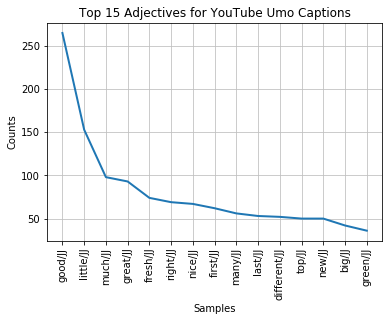

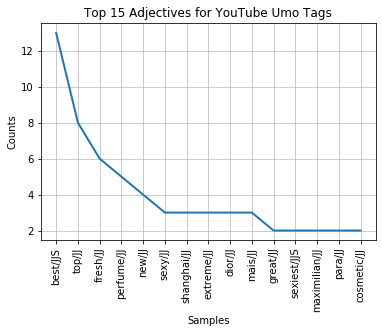

In [16]:
plot_top_adj(uomo_yt_df['Captions'], 'YouTube Umo Captions')
plot_top_adj(uomo_yt_df['Tags'], 'YouTube Umo Tags');

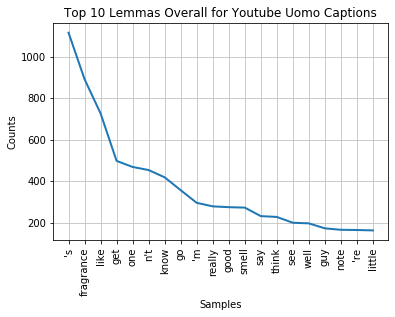

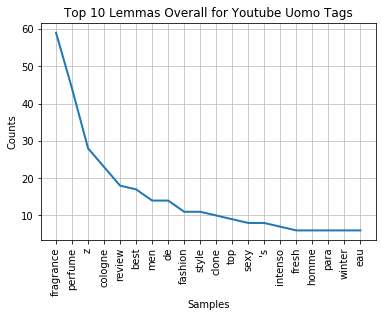

In [17]:
plot_top_lemmas(uomo_yt_df['Captions'], 'Youtube Uomo Captions')
plot_top_lemmas(uomo_yt_df['Tags'], 'Youtube Uomo Tags')

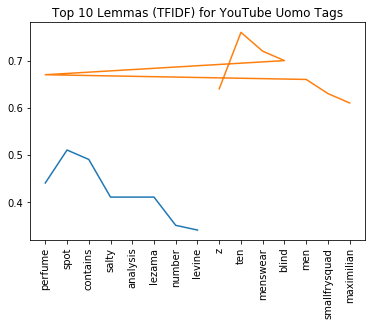

In [19]:
plot_top_tfidf(uomo_yt_df['Captions'], 'YouTube Uomo Captions')
plot_top_tfidf(uomo_yt_df['Tags'], 'YouTube Uomo Tags');